<a href="https://colab.research.google.com/github/onadith-thecoder/Power-BI-dashboard-creation-using-EA-Stock-Analysis/blob/main/2351s0479.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd

In [61]:
#describe the data frame
df = pd.read_csv('EA.csv')
df.describe()

,Volume
count,1.256000e+03
mean,2.434395e+06
std,1.471152e+06
min,4.694890e+05
25%,1.641900e+06
50%,2.102650e+06
75%,2.746594e+06
max,2.269854e+07


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [51]:
df = pd.read_csv('EA.csv')
print("Data exploration using CSV File:-")
print(f"\nDataset shape: {df.shape}")
print(f"\nFirst few rows:\n{df.head()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nBasic statistics:\n{df.describe()}")

# Checking for missing values
print(f"\nMissing values:\n{df.isnull().sum()}")

Data exploration using CSV File:-

Dataset shape: (1256, 6)

First few rows:
         Date Close/Last    Volume     Open     High      Low
0  02/06/2026    $200.00   3744261  $199.40  $200.25  $197.94
1  02/05/2026    $197.93   4006807  $196.75  $199.73  $196.41
2  02/04/2026    $196.84  11261030  $201.52  $201.56  $196.40
3  02/03/2026    $201.39   6727161  $203.83  $203.85  $201.30
4  02/02/2026    $203.60   2064507  $203.81  $204.15  $203.55

Data types:
Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

Basic statistics:
             Volume
count  1.256000e+03
mean   2.434395e+06
std    1.471152e+06
min    4.694890e+05
25%    1.641900e+06
50%    2.102650e+06
75%    2.746594e+06
max    2.269854e+07

Missing values:
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64


In [52]:
print("Data Preprocessing:-")

#Create a copy for processing
df_processed = df.copy()

#Convert Date to datetime
df_processed['Date'] = pd.to_datetime(df_processed['Date'])

#Clean price columns - remove $ and convert to float
price_columns = ['Close/Last', 'Open', 'High', 'Low']
for col in price_columns:
    df_processed[col] = df_processed[col].astype(str).str.replace('$', '').astype(float)

#Convert Volume to numeric
df_processed['Volume'] = pd.to_numeric(df_processed['Volume'])

#Sort by date (oldest first)
df_processed = df_processed.sort_values('Date').reset_index(drop=True)

#Calculate additional features
df_processed['Price_Range'] = df_processed['High'] - df_processed['Low']
df_processed['Price_Change'] = df_processed['Close/Last'] - df_processed['Open']
df_processed['Daily_Return'] = df_processed['Close/Last'].pct_change()
df_processed['MA_7'] = df_processed['Close/Last'].rolling(window=7).mean()  # 7-day moving average
df_processed['MA_30'] = df_processed['Close/Last'].rolling(window=30).mean()  # 30-day moving average
df_processed['Volatility'] = df_processed['Daily_Return'].rolling(window=7).std()

#Time index for regression (number of days)
df_processed['Days_Since_Start'] = np.arange(len(df_processed))

print("\nProcessed data preview:")
print(df_processed.head(10))
print(f"\nNew features created: Price_Range, Price_Change, Daily_Return, MA_7, MA_30, Volatility")


Data Preprocessing:-

Processed data preview:
        Date  Close/Last   Volume    Open      High      Low  Price_Range  \
0 2021-02-08      142.46  2538357  142.00  142.4900  139.340       3.1500   
1 2021-02-09      146.11  4517906  142.57  148.2300  142.430       5.8000   
2 2021-02-10      144.61  2827192  146.95  147.4100  144.120       3.2900   
3 2021-02-11      147.33  2592827  145.33  147.9405  144.610       3.3305   
4 2021-02-12      147.74  1666142  146.82  147.8400  145.040       2.8000   
5 2021-02-16      145.78  2526570  146.85  147.9092  144.620       3.2892   
6 2021-02-17      145.83  1653945  145.07  146.0300  143.365       2.6650   
7 2021-02-18      147.41  2091628  146.05  148.4100  144.180       4.2300   
8 2021-02-19      145.95  2144319  147.68  148.9800  145.440       3.5400   
9 2021-02-22      142.26  1833130  144.66  145.4000  142.000       3.4000   

   Price_Change  Daily_Return        MA_7  MA_30  Volatility  Days_Since_Start  
0          0.46          

Data visualization:-


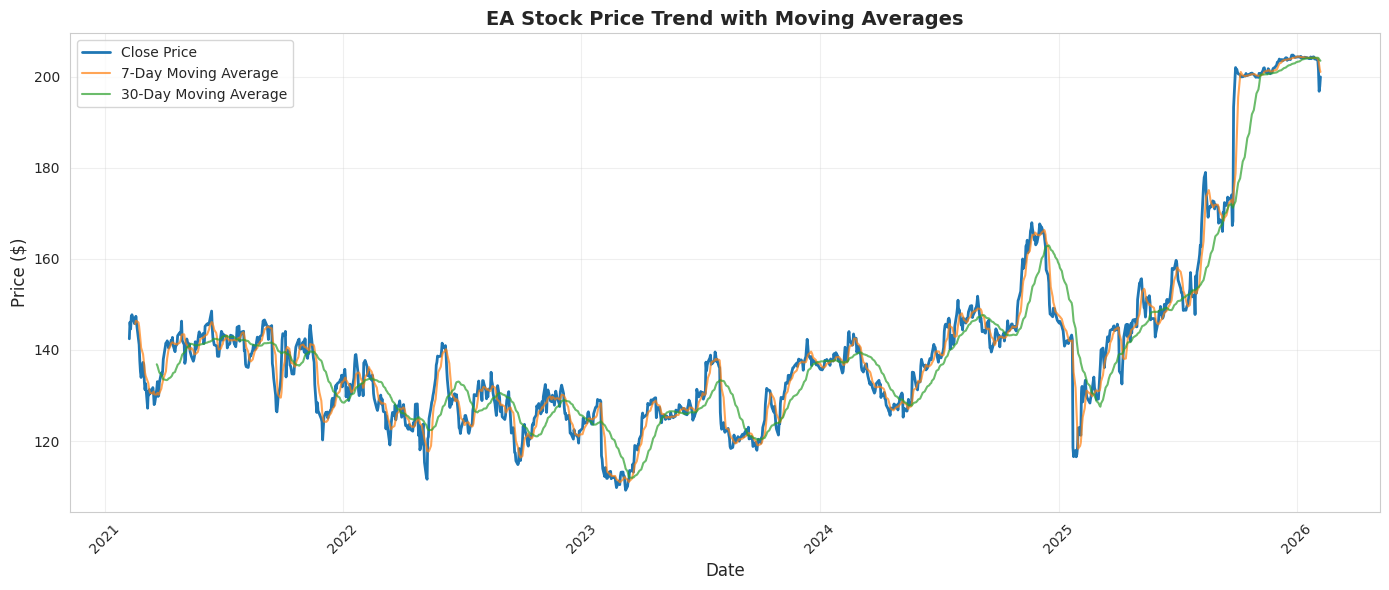

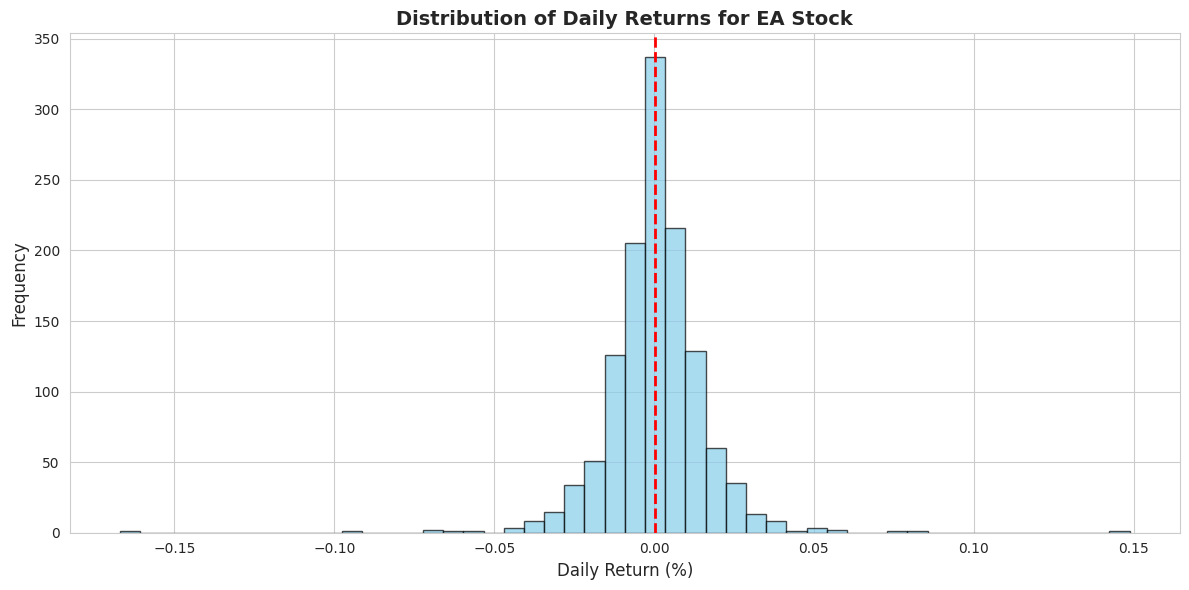

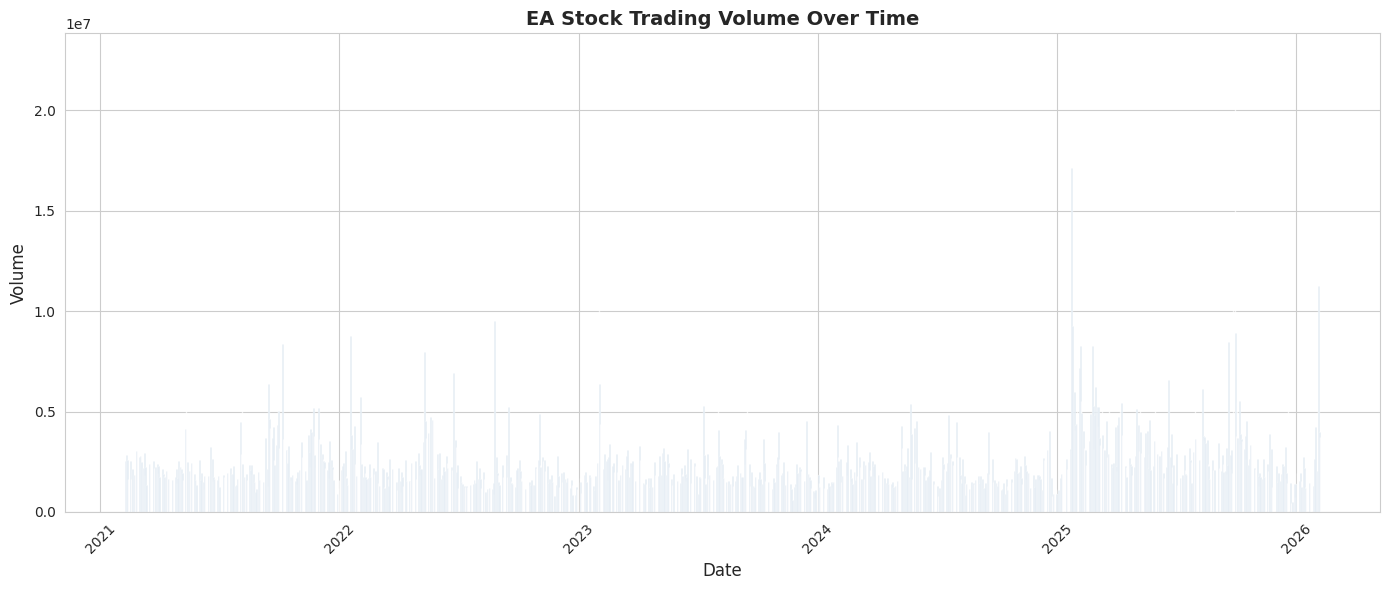

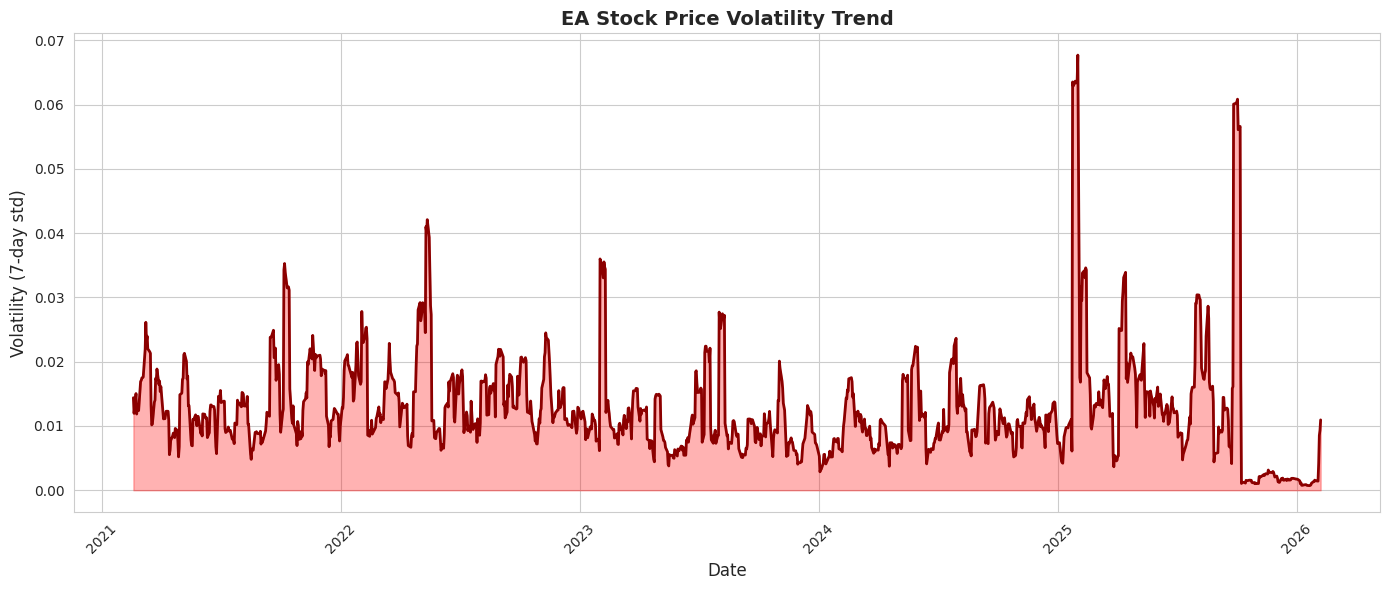

In [53]:
print("Data visualization:-")

# Figure 1:- Stock Price Trend
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df_processed['Date'], df_processed['Close/Last'], label='Close Price', linewidth=2, color='#1f77b4')
ax.plot(df_processed['Date'], df_processed['MA_7'], label='7-Day Moving Average', alpha=0.7, color='#ff7f0e')
ax.plot(df_processed['Date'], df_processed['MA_30'], label='30-Day Moving Average', alpha=0.7, color='#2ca02c')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.set_title('EA Stock Price Trend with Moving Averages', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('1_stock_price_trend.png', dpi=300, bbox_inches='tight')
plt.show()

# Figure 2:- Daily Returns Distribution
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df_processed['Daily_Return'].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('Daily Return (%)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Daily Returns for EA Stock', fontsize=14, fontweight='bold')
ax.axvline(df_processed['Daily_Return'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.tight_layout()
plt.savefig('2_returns_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Figure 3:- Volume Analysis
fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(df_processed['Date'], df_processed['Volume'], color='steelblue', alpha=0.7)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Volume', fontsize=12)
ax.set_title('EA Stock Trading Volume Over Time', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('3_volume_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Figure 4:- Volatility Trend
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df_processed['Date'], df_processed['Volatility'], color='darkred', linewidth=2)
ax.fill_between(df_processed['Date'], df_processed['Volatility'], alpha=0.3, color='red')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Volatility (7-day std)', fontsize=12)
ax.set_title('EA Stock Price Volatility Trend', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('4_volatility_trend.png', dpi=300, bbox_inches='tight')
plt.show()

Relationships visualization:-


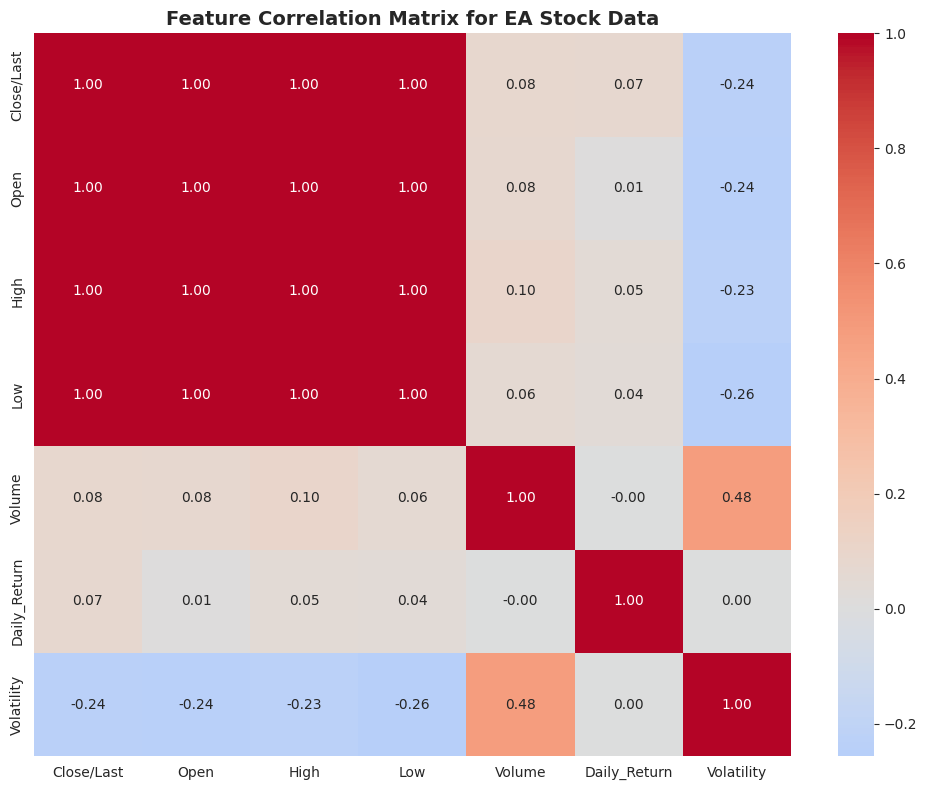

In [54]:
print("Relationships visualization:-")
# Figure 5: Correlation Heatmap
fig, ax = plt.subplots(figsize=(10, 8))
correlation_matrix = df_processed[['Close/Last', 'Open', 'High', 'Low', 'Volume', 'Daily_Return', 'Volatility']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax)
ax.set_title('Feature Correlation Matrix for EA Stock Data', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('5_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [56]:
print("linear regression part:-")

#Prepare data for regression - predict Close Price based on features:-
features_for_regression = ['Days_Since_Start', 'Volume', 'Price_Range', 'Open']
X = df_processed[features_for_regression].copy()
y = df_processed['Close/Last'].copy()

#Handle NaN values:-
mask = ~(X.isnull().any(axis=1) | y.isnull())
X = X[mask]
y = y[mask]

#Split data into training and testing (80-20 split):-
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale features for better model performance:-
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train the model:-
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#Make predictions:-
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

#Evaluate the model:-
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"\nModel Performance Metrics:")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Testing R² Score: {test_r2:.4f}")
print(f"Training RMSE: ${train_rmse:.2f}")
print(f"Testing RMSE: ${test_rmse:.2f}")
print(f"Training MAE: ${train_mae:.2f}")
print(f"Testing MAE: ${test_mae:.2f}")

# Feature importance (coefficients):-
feature_importance = pd.DataFrame({
    'Feature': features_for_regression,
    'Coefficient': model.coef_
})
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print(f"\nFeature Importance (Scaled Coefficients):")
print(feature_importance)


linear regression part:-

Model Performance Metrics:
Training R² Score: 0.9934
Testing R² Score: 0.9897
Training RMSE: $1.73
Testing RMSE: $2.03
Training MAE: $1.26
Testing MAE: $1.21

Feature Importance (Scaled Coefficients):
            Feature  Coefficient  Abs_Coefficient
3              Open    21.145707        21.145707
0  Days_Since_Start     0.138845         0.138845
1            Volume    -0.050861         0.050861
2       Price_Range    -0.037028         0.037028


Prediction visualization:-


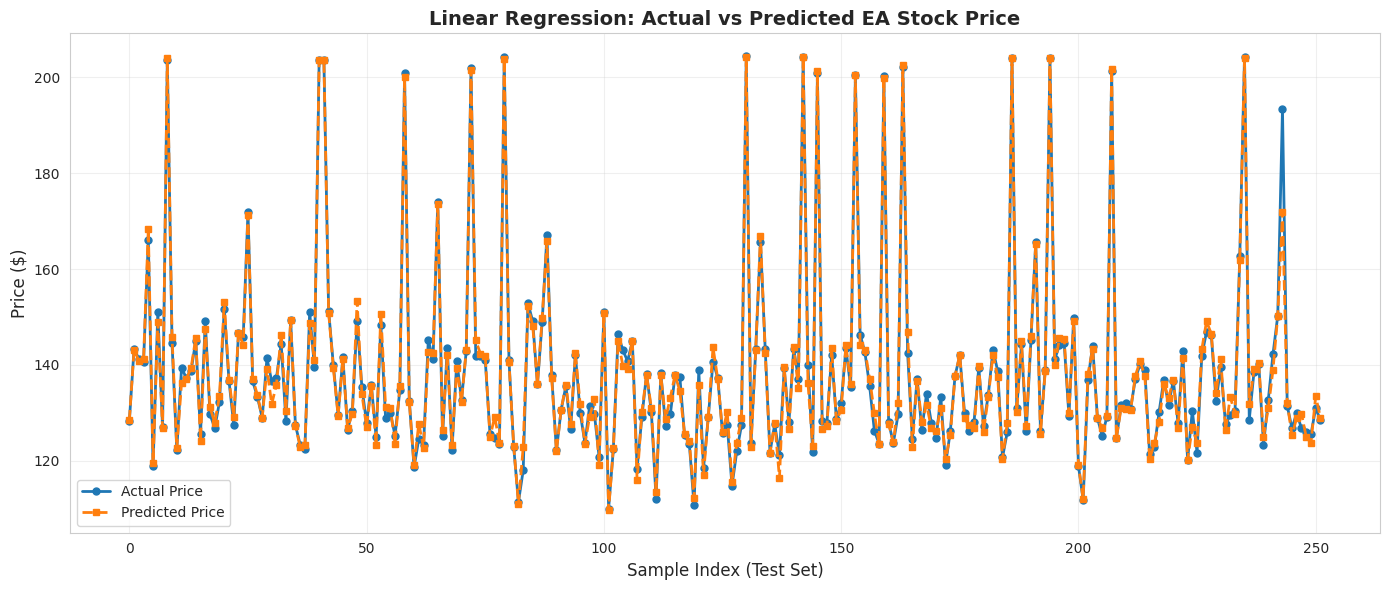

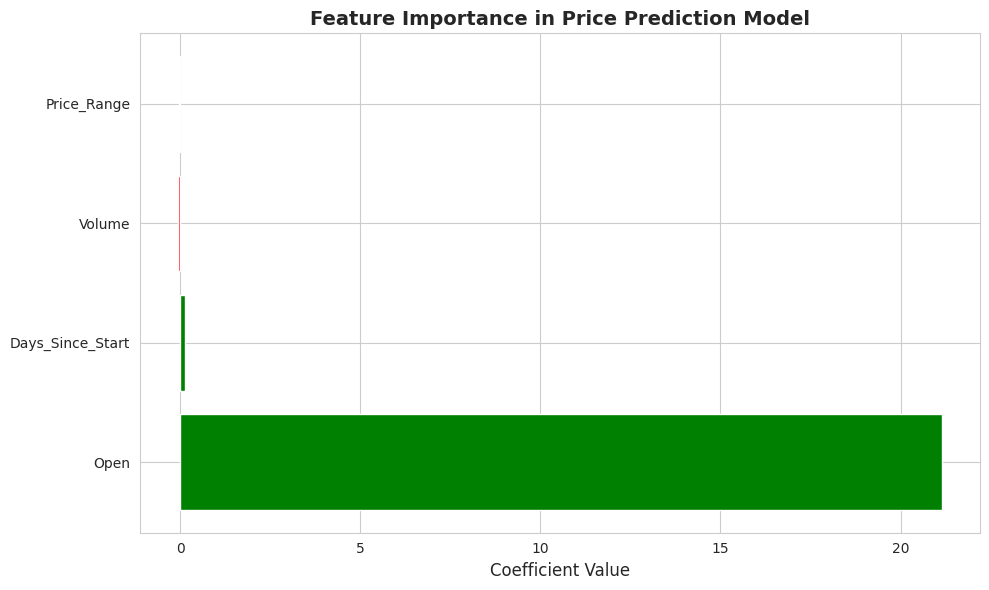

In [57]:
print("Prediction visualization:-")

#Figure 6:- Actual vs predicted price
fig, ax = plt.subplots(figsize=(14, 6))
test_indices = range(len(X_test))
ax.plot(test_indices, y_test.values, 'o-', label='Actual Price', linewidth=2, markersize=5, color='#1f77b4')
ax.plot(test_indices, y_test_pred, 's--', label='Predicted Price', linewidth=2, markersize=5, color='#ff7f0e')
ax.set_xlabel('Sample Index (Test Set)', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.set_title('Linear Regression: Actual vs Predicted EA Stock Price', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('6_actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

#Figure 7:- Feature importance
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=['green' if x > 0 else 'red' for x in feature_importance['Coefficient']])
ax.set_xlabel('Coefficient Value', fontsize=12)
ax.set_title('Feature Importance in Price Prediction Model', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('7_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

Prise forecast:-

Forecast for next 30 days:
   Days_Ahead  Forecasted_Price
0           1        199.166441
1           2        199.166822
2           3        199.167202
3           4        199.167582
4           5        199.167962
5           6        199.168342
6           7        199.168722
7           8        199.169102
8           9        199.169482
9          10        199.169862

Average Forecasted Price (Next 30 days): $199.17
Min Forecasted Price: $199.17
Max Forecasted Price: $199.18


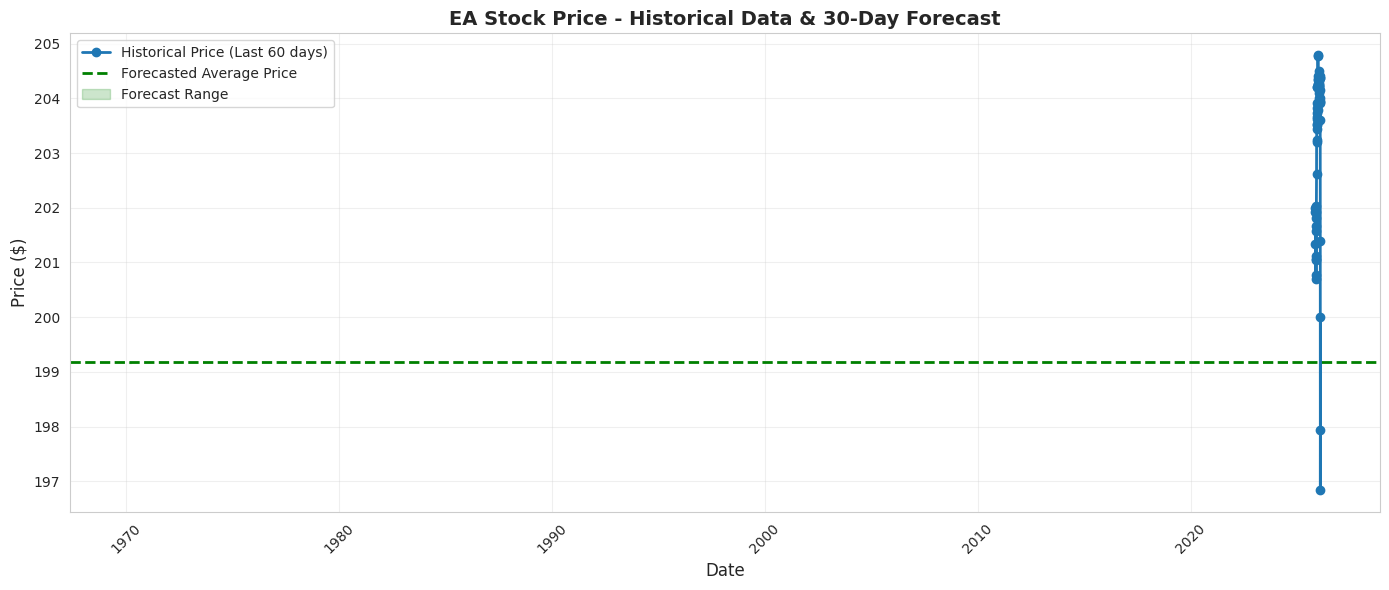

In [58]:
print("Prise forecast:-")

#Forecast for next 30 days:-
last_days_since_start = df_processed['Days_Since_Start'].iloc[-1]
last_volume = df_processed['Volume'].iloc[-1]
last_price_range = df_processed['Price_Range'].iloc[-1]
last_open = df_processed['Open'].iloc[-1]

forecast_days = 30
forecast_data = []

for i in range(1, forecast_days + 1):
    days_value = last_days_since_start + i
    X_forecast = np.array([[days_value, last_volume, last_price_range, last_open]])
    X_forecast_scaled = scaler.transform(X_forecast)
    predicted_price = model.predict(X_forecast_scaled)[0]
    forecast_data.append({
        'Days_Ahead': i,
        'Forecasted_Price': predicted_price
      })

forecast_df = pd.DataFrame(forecast_data)
print(f"\nForecast for next {forecast_days} days:")
print(forecast_df.head(10))
print(f"\nAverage Forecasted Price (Next 30 days): ${forecast_df['Forecasted_Price'].mean():.2f}")
print(f"Min Forecasted Price: ${forecast_df['Forecasted_Price'].min():.2f}")
print(f"Max Forecasted Price: ${forecast_df['Forecasted_Price'].max():.2f}")

#Figure 8:- Price forecast
fig, ax = plt.subplots(figsize=(14, 6))
recent_dates = df_processed['Date'].tail(60)
recent_prices = df_processed['Close/Last'].tail(60)
ax.plot(recent_dates, recent_prices, 'o-', label='Historical Price (Last 60 days)', linewidth=2, color='#1f77b4')
ax.axhline(forecast_df['Forecasted_Price'].mean(), color='green', linestyle='--', linewidth=2, label='Forecasted Average Price')
ax.fill_between(range(len(recent_dates), len(recent_dates) + forecast_days),
                forecast_df['Forecasted_Price'].min(),
                forecast_df['Forecasted_Price'].max(),
                alpha=0.2, color='green', label='Forecast Range')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.set_title('EA Stock Price - Historical Data & 30-Day Forecast', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('8_price_forecast.png', dpi=300, bbox_inches='tight')
plt.show()

In [59]:
print("Key insights and summary:-")

latest_close = df_processed['Close/Last'].iloc[-1]
price_change_overall = df_processed['Close/Last'].iloc[-1] - df_processed['Close/Last'].iloc[0]
price_change_pct = (price_change_overall / df_processed['Close/Last'].iloc[0]) * 100
avg_volume = df_processed['Volume'].mean()
max_volatility = df_processed['Volatility'].max()
avg_daily_return = df_processed['Daily_Return'].mean() * 100

print(f"   • Latest Stock Price: ${latest_close:.2f}")
print(f"   • Overall Price Change: ${price_change_overall:.2f} ({price_change_pct:.2f}%)")
print(f"   • Average Daily Trading Volume: {avg_volume:,.0f}")
print(f"   • Maximum Volatility: {max_volatility:.4f}")
print(f"   • Average Daily Return: {avg_daily_return:.2f}%")
print(f"   • Model R² Score (Test): {test_r2:.4f}")
print(f"   • Prediction Accuracy (MAE): ±${test_mae:.2f}")

# Save processed data for Power BI
df_processed_export = df_processed[['Date', 'Close/Last', 'Open', 'High', 'Low', 'Volume', 'MA_7', 'MA_30', 'Daily_Return', 'Volatility']].copy()
df_processed_export.to_csv('EA_processed_data.csv', index=False)

Key insights and summary:-
   • Latest Stock Price: $200.00
   • Overall Price Change: $57.54 (40.39%)
   • Average Daily Trading Volume: 2,434,395
   • Maximum Volatility: 0.0677
   • Average Daily Return: 0.04%
   • Model R² Score (Test): 0.9897
   • Prediction Accuracy (MAE): ±$1.21
